# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Multiple features (N-Dimensional)
* What is the relation b/w each advertising channel i.e; (TV, radio, newspaper) & sales?

<AxesSubplot:xlabel='TV', ylabel='sales'>

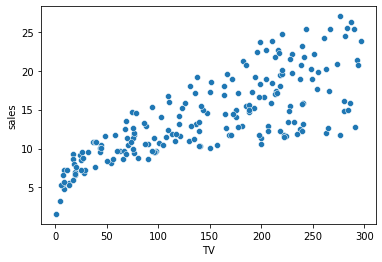

In [10]:
#TV
sns.scatterplot(x="TV", y="sales", data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

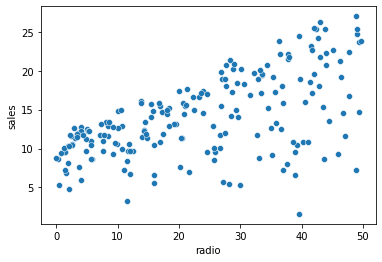

In [11]:
# radio
sns.scatterplot(x="radio", y="sales", data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

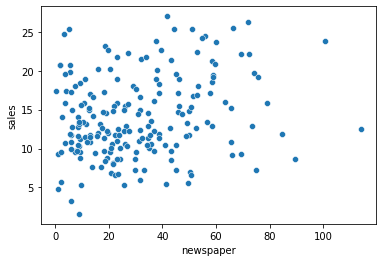

In [12]:
# newspaper
sns.scatterplot(x="newspaper", y="sales", data=df)

<AxesSubplot:xlabel='TV', ylabel='sales'>

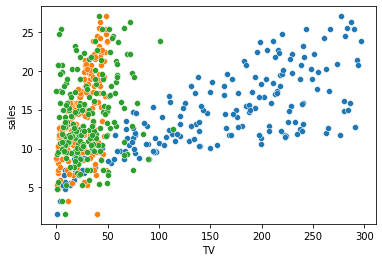

In [9]:
# combined
sns.scatterplot(x="TV", y="sales", data=df)
sns.scatterplot(x="radio", y="sales", data=df)
sns.scatterplot(x="newspaper", y="sales", data=df)

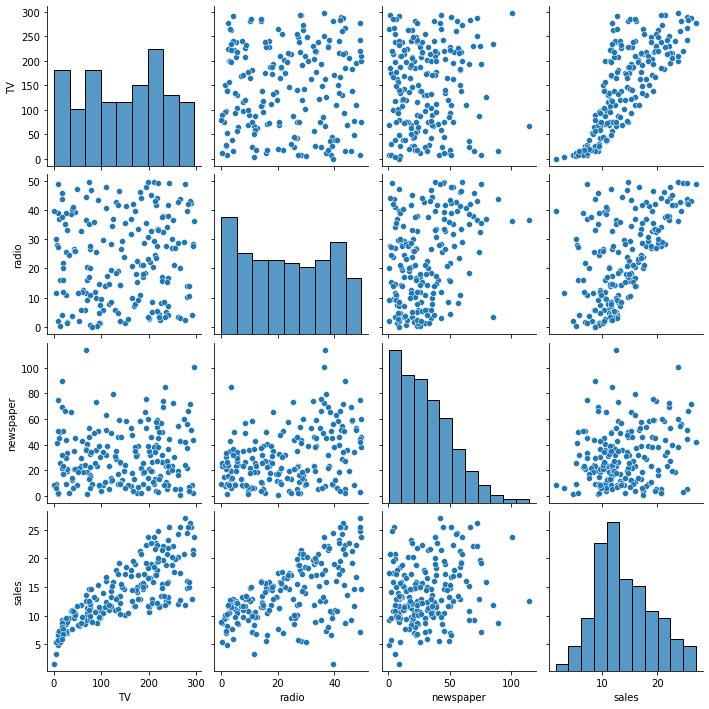

In [13]:
#Relationships b/w features...1

sns.pairplot(df)

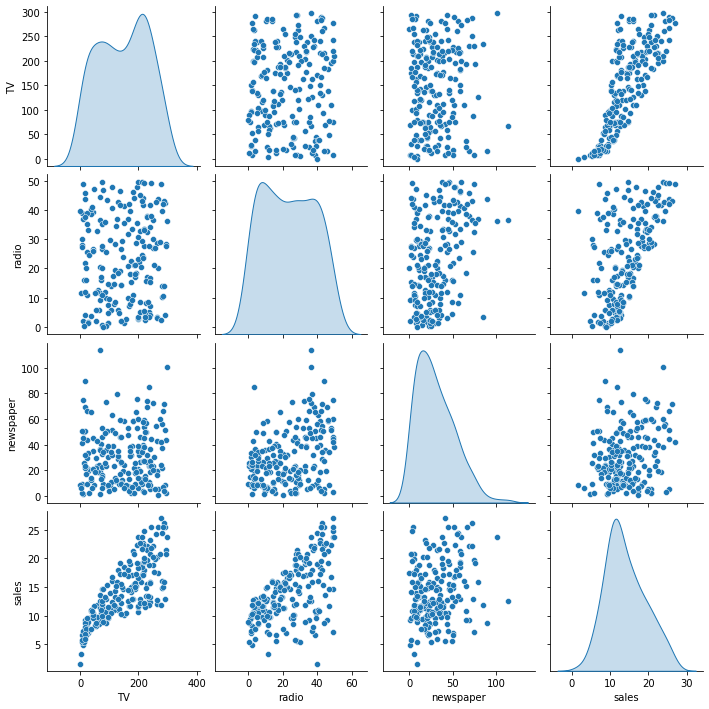

In [14]:
#Relationships b/w features...2

sns.pairplot(df, diag_kind="kde")

# Introduction using Scikit Learn

In [15]:
X=df.drop("sales", axis=1)
Y=df["sales"]

In [16]:
from sklearn.model_selection import train_test_split

In [ ]:
# Random state

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=.30,
                                                    random_state=101)

In [26]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                   Y,
#                                                   test_size=0.2,
#                                                   random_state=51)

In [23]:
# X_train

# Creating a Model (Estimator)
* Import a model class from a model family

In [28]:
from sklearn.linear_model import LinearRegression

* Create an instance of the model with Parameters

In [30]:
#Help
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

# Fit / Train the model on the training dataset

In [31]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

# Understanding and Utilizing the model

## Evaluation on the test dataset

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error

* X_test
* We only pass in test features
* The model predicts its own Y-hat
* We can then compare these results to the true y_test label values

In [35]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [43]:
#Mean Absolute Error
MAE

1.213745773614481

In [44]:
#Mean Squared Error
MSE

2.2987166978863782

In [45]:
#Root Mean Squared Error
RMSE

1.516151937599388

# Plotting the Residuals
* In statistical models, a residual is the difference between the observed value and the mean value that the model predicts for that observation.
* Predictions on training and testing sets
* Doing residuals seperately will alert us to any issue with the split

In [46]:
test_presictions = model.predict(X_test)

In [47]:
test_res = y_test-test_presictions

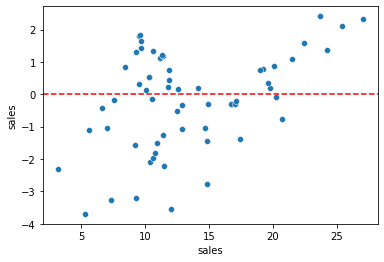

In [52]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y= 0, color= "r", linestyle= "--")

In [53]:
#no. of observations:
len(test_res)

60

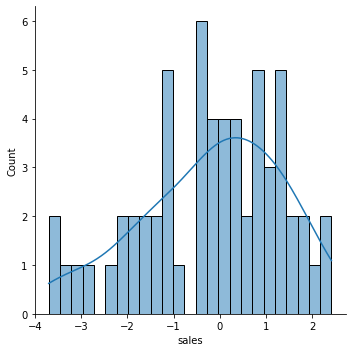

In [54]:
sns.displot(test_res, bins=25,kde=True)

In [55]:
import scipy as sp

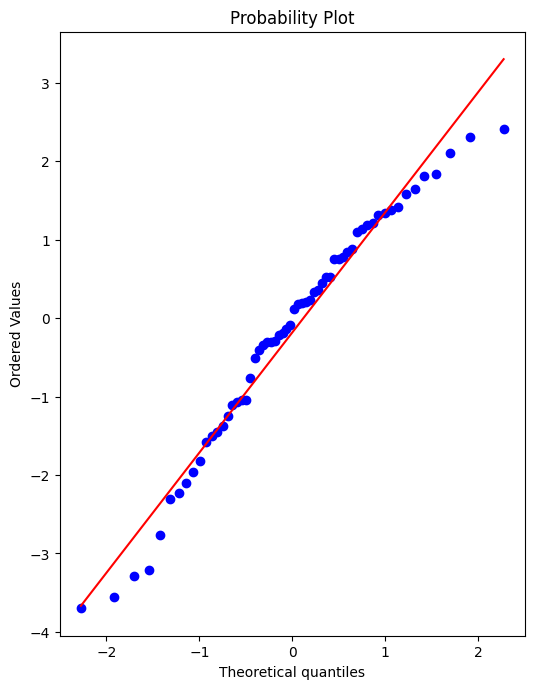

In [59]:
# create a figure and axis to plot on...

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probability plot returns the raw value if needed...
# we just want to see the plot, so we asign these values to "_"

_ = sp.stats.probplot(test_res,plot=ax)

In [60]:
#Retraining:

final_model=LinearRegression()

In [62]:
final_model.fit(X,Y)

LinearRegression()

In [64]:
y_hat = final_model.predict(X)

In [ ]:
sns.scatterplot(x="TV", y="sales", data=df)
sns.scatterplot(x="radio", y="sales", data=df)
sns.scatterplot(x="newspaper", y="sales", data=df)

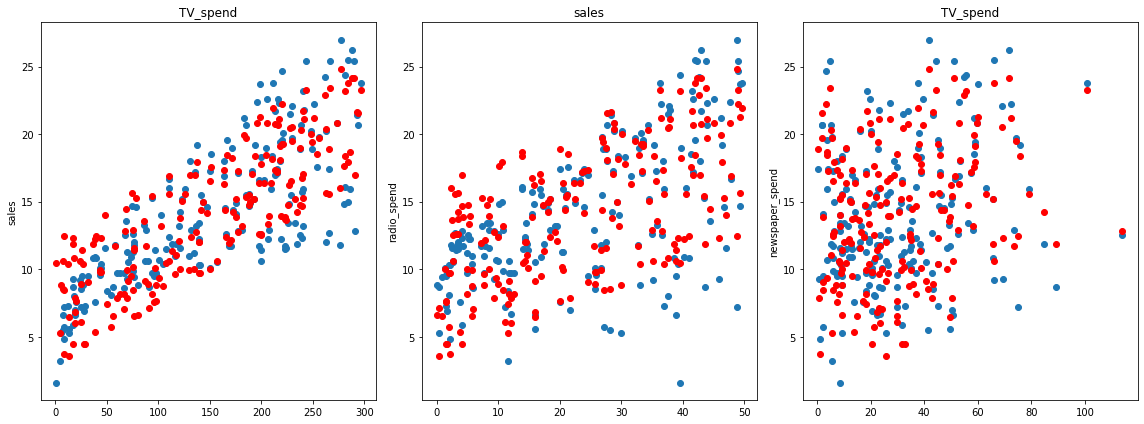

In [67]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df["TV"],df["sales"],"o")
axes[0].plot(df["TV"], y_hat, "o", color="red")
axes[0].set_ylabel("sales")
axes[0].set_title("TV_spend")

axes[1].plot(df["radio"],df["sales"],"o")
axes[1].plot(df["radio"], y_hat, "o", color="red")
axes[1].set_ylabel("radio_spend")
axes[1].set_title("sales")

axes[2].plot(df["newspaper"],df["sales"],"o")
axes[2].plot(df["newspaper"], y_hat, "o", color="red")
axes[2].set_ylabel("newspaper_spend")
axes[2].set_title("TV_spend")
plt.tight_layout();

# COEFFICIENT

In [70]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
coeff_df=pd.DataFrame(final_model.coef_,X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


##### Interpretting the Coefficients:
* The TV coefficient in the regression is 0.04576465. This coefficient represents the mean increase of sales in for every additional unit. 
* Keeping all other constant a 1 unit (1000 dollars) increase in TV spend is associated with an increase in sales of 0.04576465 sales unit. This basically means that for every 1000 dollars spend on TV ads, we could expect 45 more units sold.

In [77]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [75]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [76]:
final_model.intercept_

2.938889369459412

In [79]:
# TV = 149k , radio = 22k , newspaper = 12k
campaign = [[149,22,12]]

In [81]:
#Predicting...
final_model.predict(campaign)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])